In [3]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import os

In [4]:
DATA_PARENT_DIR = '../Task1/brain/'
iterable_dir_list = sorted(os.listdir(DATA_PARENT_DIR), key=lambda x: x)
dataset_parent_dir = [os.path.join(DATA_PARENT_DIR, mri_path) for mri_path in iterable_dir_list]

In [3]:
parent_dir = dataset_parent_dir[0]
mri_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(parent_dir,'mr.nii.gz')))
segment_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(parent_dir,'mr_segmented2.nii.gz')))
# segment_img = sitk.GetArrayFromImage(sitk.ReadImage('../Task1/mr_segmented.nii.gz'))

In [17]:
from matplotlib.colors import ListedColormap
LIGHT_BLUE = '#00ffff'
ORANGE = '#ff8040'
PURPLE = '#8000ff'
GREEN = '#16a70b'
LIGHT_PINK = '#ff80c0'
DARK_GREEN = '#008100'
DARK_BLUE = '#0000ff'
NEON_PINK = '#ff00ff'
LIGHT_GREEN = '#00ff00'
GRAY = '#909091' #FIXME: match with image in Drive
TAN = '#ebda96'
LIGHT_RED = '#fa8072'
BLACK = '#000000ff'
BLACK_TRANSPARENT = '#00000000'

#               Light blue          orange              Purple                 Green                   light pink       dark green      dark blue         neon pink            light green      grey                    tan                 light red
RGB_VALUES = [(0, 255, 255, 255), (255, 128, 64, 255), (128, 0, 255, 255), (22, 167, 11, 255), (255, 128, 192, 255), (0, 129, 0, 255), (0, 0, 255, 255), (255, 0, 255, 255), (0, 255, 0, 255), (144, 144, 145, 255), (235, 218, 150, 255), (250, 128, 114, 255)]
RANGES = [[0, 0.5], [0.5, 1.5], [1.5, 2.5], [2.5, 3.5], [3.5, 4.5], [4.5, 5.5], [5.5, 6.5], [6.5, 7.5], [7.5, 8.5], [8.5, 9.5], [9.5, 10.5], [10.5, 11.5]]

def plot_mr_segment_sidebyside(image, segmented_image, slice_number=100):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(image[:,-slice_number,:], cmap='gray', interpolation='none')
    # plt.imshow(np.flipud(image[:,-slice_number,:]), cmap='gray', interpolation='none')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(segmented_image[:,slice_number,:], cmap='gray', interpolation='none')
    rgba_colors = [BLACK_TRANSPARENT, LIGHT_PINK, ORANGE, GRAY, PURPLE, BLACK_TRANSPARENT, DARK_BLUE, NEON_PINK, LIGHT_GREEN, LIGHT_BLUE, BLACK_TRANSPARENT, LIGHT_RED]
    outline_list = [(250, 128, 114, 255), (0, 255, 255, 255), (0, 255, 0, 255), (255, 0, 255, 255), (0, 0, 255, 255), (128, 0, 255, 255), (144, 144, 145, 255), (255, 128, 64, 255), (255, 128, 192, 255)]
    outline_list = outline_list[::-1]
    for num, color in enumerate(rgba_colors):
        if color == BLACK_TRANSPARENT:
            continue
        cmap = ListedColormap([color])
        cmap.set_over((0, 0, 0, 0))
        cmap.set_under((0, 0, 0, 0))
        cmap.set_bad((0, 0, 0, 0))
        plt.imshow(segmented_image[:,slice_number,:], cmap=cmap, interpolation='none', vmin=RANGES[num][0], vmax=RANGES[num][1])
    plt.show()


def tissue_hist_plot(image, tissue_labels = [9, 10, 11]):
    # tissue_labels = [9, 10, 11] # skin, fat, muscle
    cortical_bone_label = 8
    soft_tissue = []
    cortical_bone = []
    plt.figure(figsize=(6,3))

    for z in range(image.shape[0]):
        soft_tissue.append(np.sum(np.isin(image[z, :, :], tissue_labels)))
        cortical_bone.append(np.sum(image[z, :, :] == cortical_bone_label))

    window_size = 5
    soft_tissue_smooth = np.convolve(soft_tissue, np.ones(window_size)/window_size, mode='same')
    plt.subplot(1,2,1)
    plt.plot(soft_tissue_smooth)
    plt.xlabel('soft tissue histogram in z direction')
    vals = list(enumerate(np.diff(soft_tissue_smooth)))
    sorted_by_second = sorted(vals, key=lambda tup: -tup[1])
    print("biggest derivative (slice, value):", sorted_by_second[:5])

    cortical_bone_smoothed = np.convolve(np.array(cortical_bone), np.ones(window_size)/window_size, mode='same')
    plt.subplot(1,2,2)
    plt.plot(cortical_bone_smoothed)
    plt.xlabel('cortical bone histogram in z direction')
    plt.show()

def do_everything(image_parent_directory, slice_number=100):
    mri_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(image_parent_directory,'mr.nii.gz')))
    segment_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(image_parent_directory,'mr_segmented2.nii.gz')))
    plot_mr_segment_sidebyside(mri_img, segment_img, slice_number), tissue_hist_plot(segment_img)

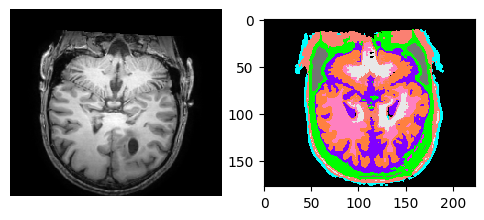

biggest derivative (slice, value): [(17, 606.0), (18, 536.0), (19, 517.2000000000007), (16, 503.59999999999945), (15, 485.40000000000055)]


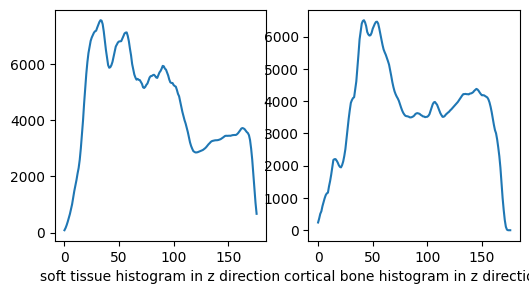

(None, None)

In [23]:
plot_mr_segment_sidebyside(mri_img, segment_img), tissue_hist_plot(segment_img)

In [9]:
runned_images = dataset_parent_dir[:16]
runned_images

['../Task1/brain/1BA001',
 '../Task1/brain/1BA005',
 '../Task1/brain/1BA012',
 '../Task1/brain/1BA014',
 '../Task1/brain/1BA022',
 '../Task1/brain/1BA032',
 '../Task1/brain/1BA040',
 '../Task1/brain/1BA054',
 '../Task1/brain/1BA058',
 '../Task1/brain/1BA075',
 '../Task1/brain/1BA076',
 '../Task1/brain/1BA082',
 '../Task1/brain/1BA085',
 '../Task1/brain/1BA091',
 '../Task1/brain/1BA097',
 '../Task1/brain/1BA100']

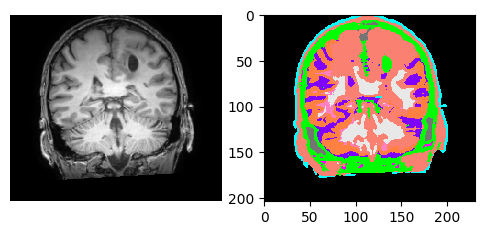

biggest derivative (slice, value): [(2, 550.0), (17, 549.1999999999998), (18, 518.8000000000002), (19, 513.4000000000005), (1, 482.20000000000016)]


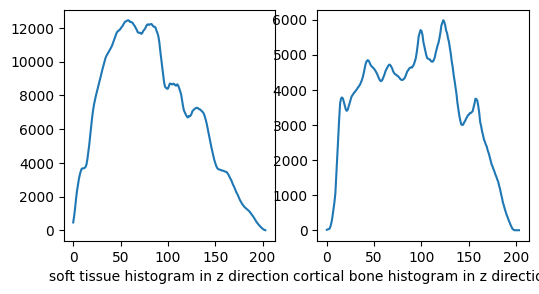

In [13]:
dir = runned_images[0]
do_everything(dir)

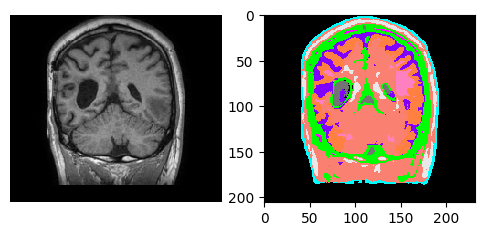

biggest derivative (slice, value): [(1, 736.0), (2, 679.1999999999998), (3, 646.4000000000001), (0, 606.6000000000001), (4, 591.2000000000003)]


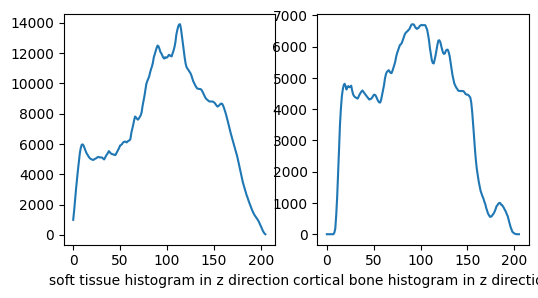

In [16]:
do_everything(runned_images[1])

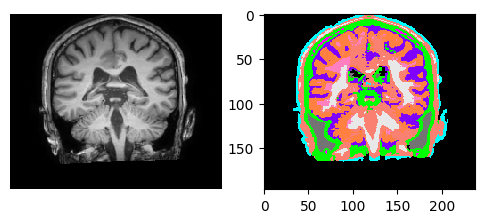

biggest derivative (slice, value): [(1, 514.6000000000001), (3, 504.39999999999964), (2, 483.0), (4, 442.60000000000036), (5, 417.8000000000002)]


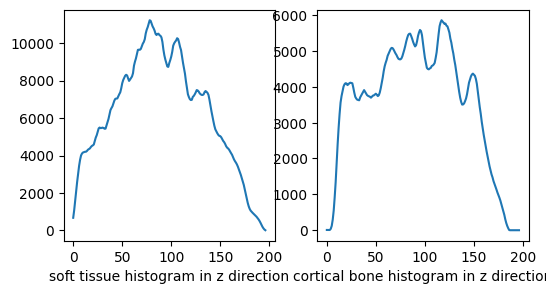

In [17]:
do_everything(runned_images[2])

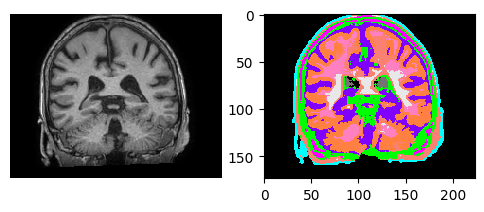

biggest derivative (slice, value): [(1, 415.60000000000014), (2, 388.5999999999999), (0, 359.6), (61, 343.40000000000055), (3, 288.79999999999995)]


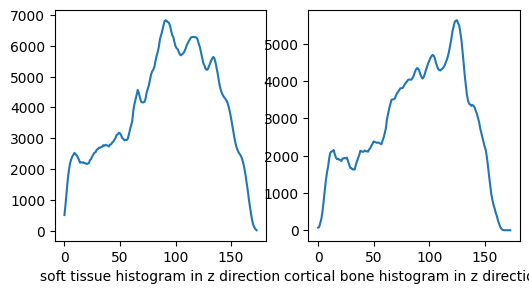

In [18]:
do_everything(runned_images[3])

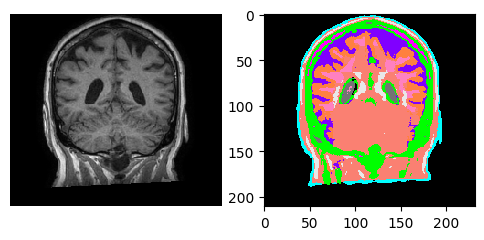

biggest derivative (slice, value): [(73, 709.0000000000018), (61, 651.6000000000004), (2, 633.2000000000003), (1, 607.8), (3, 601.7999999999997)]


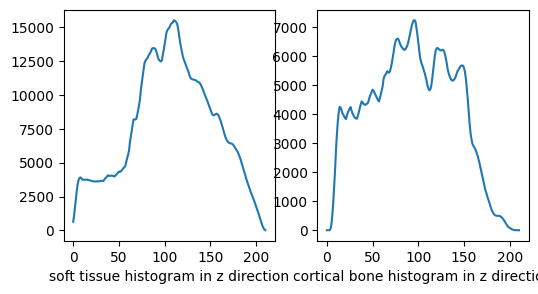

In [28]:
do_everything(runned_images[4])

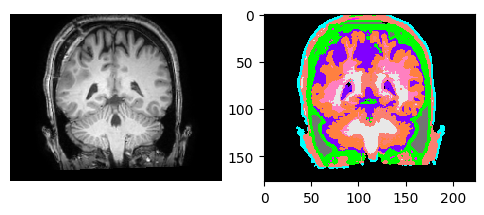

biggest derivative (slice, value): [(1, 613.2), (3, 547.8000000000002), (2, 539.6000000000001), (0, 525.3999999999999), (4, 441.5999999999999)]


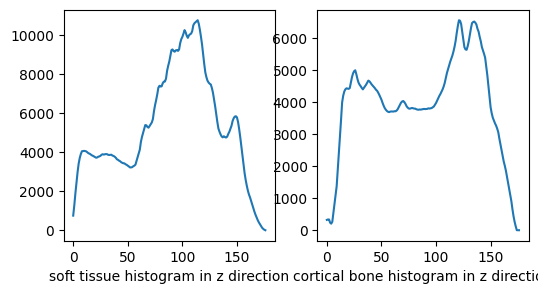

In [29]:
do_everything(runned_images[5])

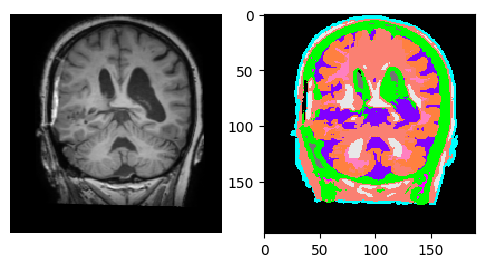

biggest derivative (slice, value): [(1, 552.3999999999999), (0, 492.20000000000005), (2, 405.5999999999999), (97, 405.2000000000007), (76, 370.59999999999854)]


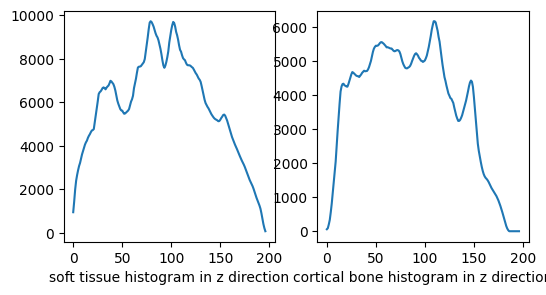

In [19]:
do_everything(runned_images[10])

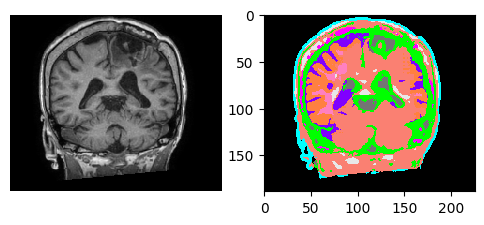

biggest derivative (slice, value): [(4, 650.5999999999999), (3, 644.5999999999999), (5, 607.8000000000002), (100, 592.0), (99, 550.0000000000018)]


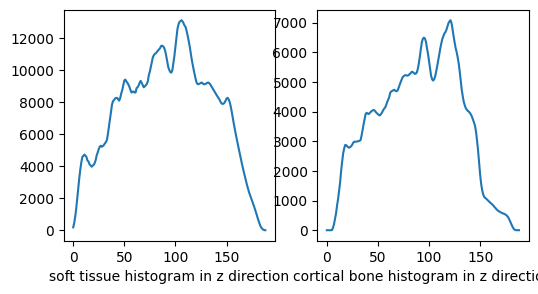

In [20]:
do_everything(runned_images[15])

Let's concentrate on one image and see if different tissues has different behaviors

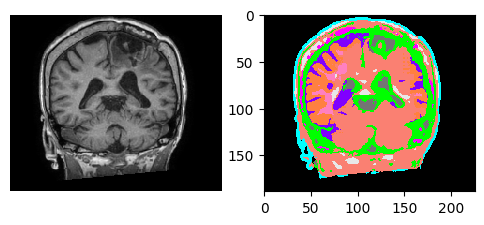

In [27]:
dir = runned_images[15]
mri_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dir,'mr.nii.gz')))
segment_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dir,'mr_segmented2.nii.gz')))
plot_mr_segment_sidebyside(mri_img, segment_img)

biggest derivative (slice, value): [(4, 650.5999999999999), (3, 644.5999999999999), (5, 607.8000000000002), (100, 592.0), (99, 550.0000000000018)]


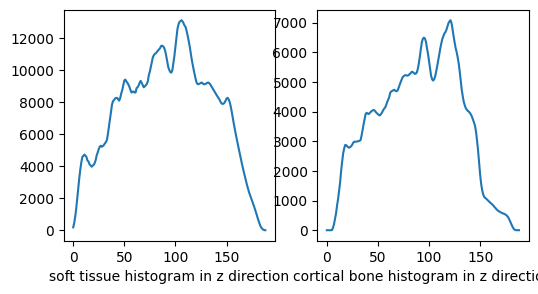

biggest derivative (slice, value): [(2, 304.20000000000005), (3, 299.0), (1, 258.79999999999995), (4, 243.0), (0, 203.0)]


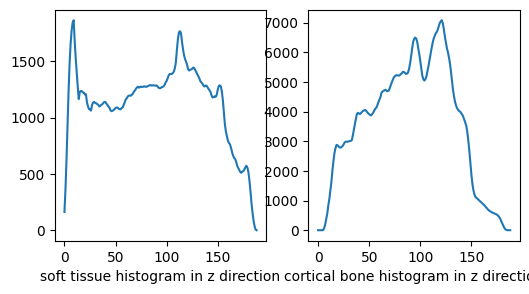

biggest derivative (slice, value): [(3, 208.79999999999995), (4, 207.39999999999998), (2, 161.0), (5, 150.0000000000001), (1, 117.0)]


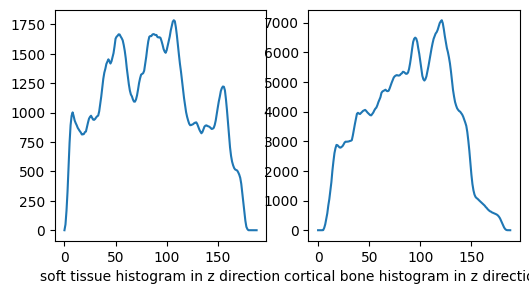

biggest derivative (slice, value): [(100, 530.2000000000007), (99, 514.4000000000005), (101, 481.0), (97, 459.59999999999945), (98, 423.8000000000002)]


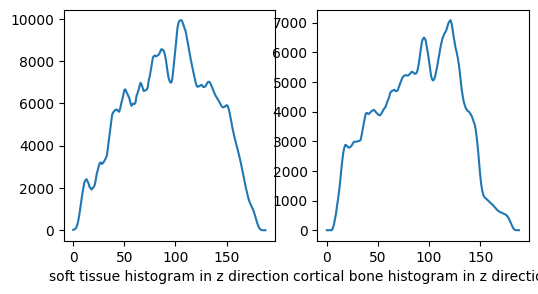

(None,)

In [25]:
tissue_hist_plot(segment_img, tissue_labels=[9,10,11]),
tissue_hist_plot(segment_img, tissue_labels=[9]),  # skin
tissue_hist_plot(segment_img, tissue_labels=[10]), # fat
tissue_hist_plot(segment_img, tissue_labels=[11]), # muscle

At least in this batch of images that we saw above, the segmentation on fat and muscle doesn't work good. it takes white matter of the brain as muscle which is not desirable. skin and fat are also random. sometimes hypothalamos is considered as fat. and distribution of skin is more or less uniform.

But on the other hand, cortical bone seems to be working better in our case (the green color). if you see from the image, the neck usually starts at slice ~150 and most of the time we have a peak in the histogram of cortical bone at position 150. 

Now we have two options:
- Either set a threshold slice manually and zero-out the slices after 150 (for example)
- Or we find the first peak of cortical bone and add a padding slice (for example 10 slices) so that we would be sure that we are not deleting any skull bone. We also make sure that the aformentioned slice would be after slice 140 because we are more or less sure that there is definitly skull in slices before 140 (more or less; to be confirmed).

I run the code again. let's see the results of the Grace for each category

the result is upside down compare to previous run. so the numbers are reverted. 150 would be 50

In [7]:
dataset_parent_dir[0], dataset_parent_dir[61], dataset_parent_dir[121]

('../Task1/brain/1BA001', '../Task1/brain/1BB003', '../Task1/brain/1BC004')

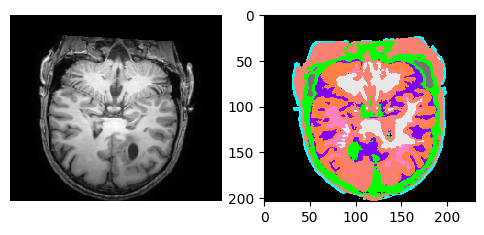

biggest derivative (slice, value): [(109, 359.39999999999964), (112, 280.59999999999945), (111, 275.3999999999987), (110, 270.60000000000036), (113, 257.8000000000011)]


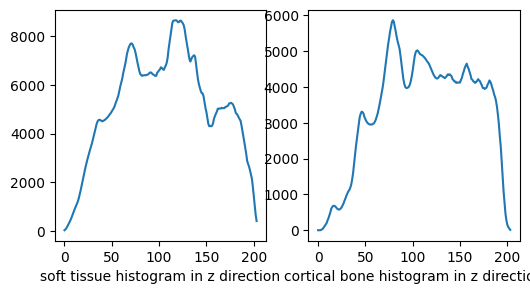

In [14]:
do_everything(dataset_parent_dir[0])

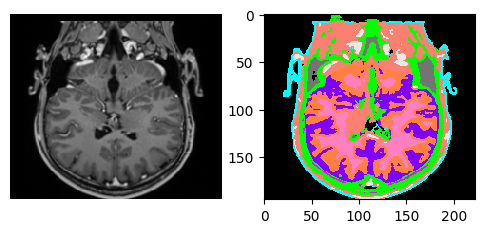

biggest derivative (slice, value): [(11, 734.8000000000002), (7, 722.4000000000005), (12, 700.8000000000002), (13, 699.2000000000007), (6, 697.5999999999999)]


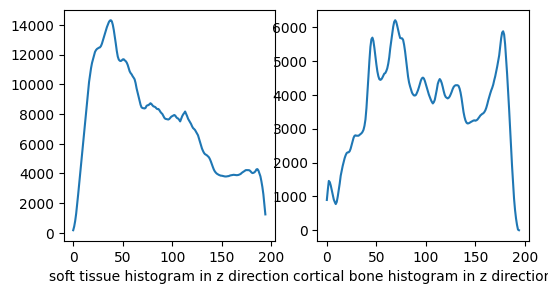

In [13]:
do_everything(dataset_parent_dir[61])

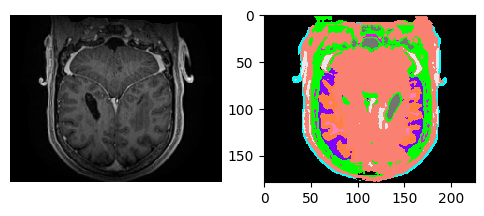

biggest derivative (slice, value): [(7, 1596.3999999999996), (8, 1511.0), (6, 1349.6000000000004), (5, 1203.8000000000002), (9, 1053.2000000000007)]


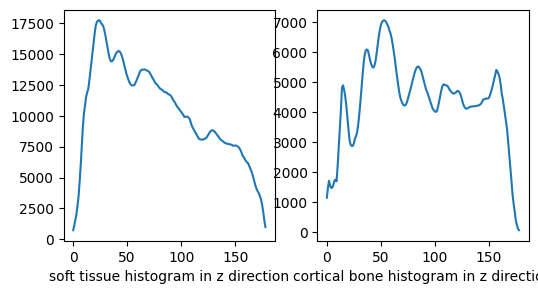

In [12]:
do_everything(dataset_parent_dir[121])

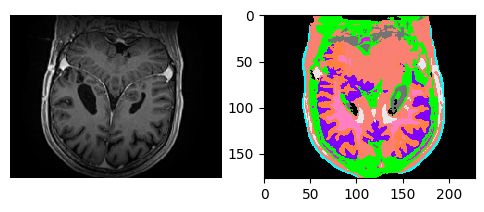

biggest derivative (slice, value): [(7, 1789.3999999999996), (6, 1583.6000000000004), (8, 1480.4000000000015), (5, 1475.3999999999996), (4, 1108.4)]


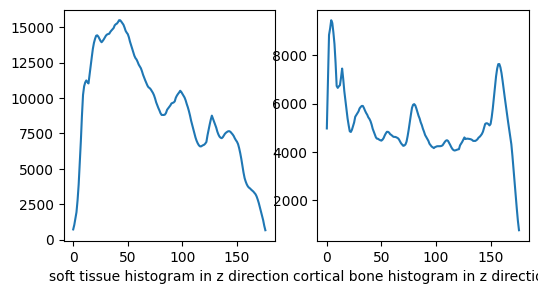

In [15]:
do_everything(dataset_parent_dir[122])

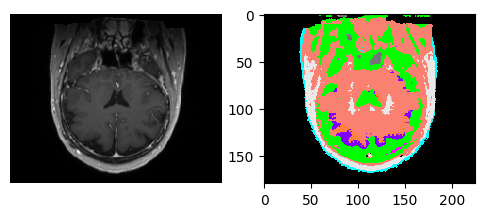

biggest derivative (slice, value): [(7, 1155.6), (8, 1034.4000000000005), (9, 988.0), (6, 953.0), (10, 871.1999999999998)]


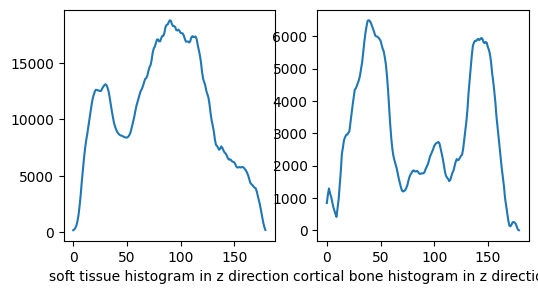

In [22]:
do_everything(dataset_parent_dir[141], slice_number=150)

Grace for category C didn't work good. but let's find the neck for category A and B

In [52]:
def cortical_hist(image, window_size = 10):
    cortical_bone_label = 8
    cortical_bone = []

    for z in range(image.shape[0]):
        cortical_bone.append(np.sum(image[z, :, :] == cortical_bone_label))

    cortical_bone_smoothed = np.convolve(np.array(cortical_bone), np.ones(window_size)/window_size, mode='same')
    return cortical_bone_smoothed

def read_img_and_seg(image_parent_directory):
    mri_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(image_parent_directory,'mr.nii.gz')))
    segment_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(image_parent_directory,'mr_segmented2.nii.gz')))
    return mri_img, segment_img

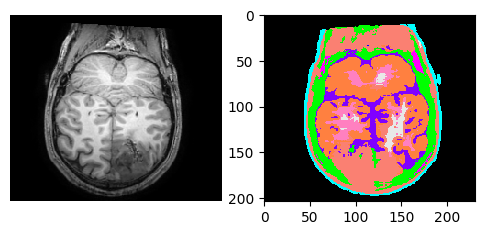

biggest derivative (slice, value): [(109, 359.39999999999964), (112, 280.59999999999945), (111, 275.3999999999987), (110, 270.60000000000036), (113, 257.8000000000011)]


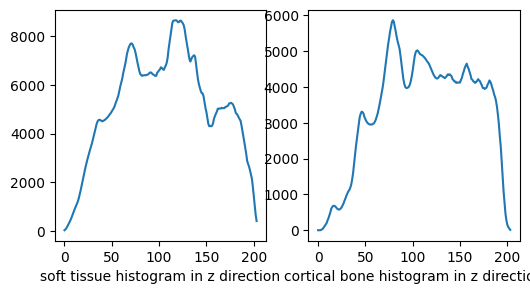

In [35]:
do_everything(dataset_parent_dir[0], slice_number=80)

In [36]:
hist = cortical_hist(read_img_and_seg(dataset_parent_dir[0])[1])
len(hist)

204

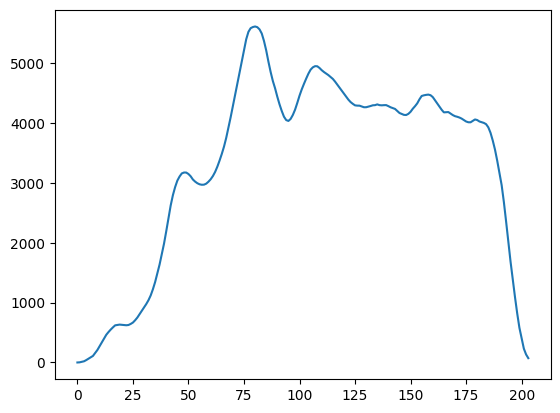

In [37]:
plt.plot(hist)

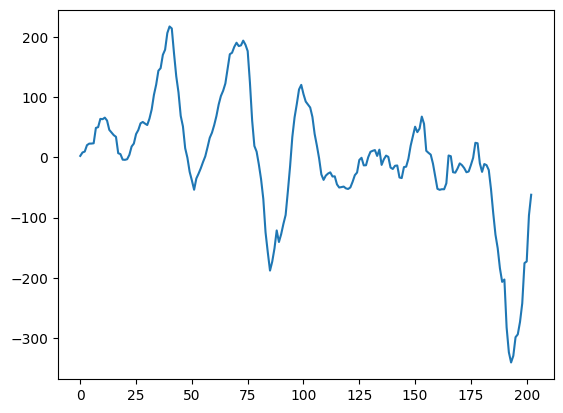

In [38]:
plt.plot(np.diff(hist))

[(40, 217.4000000000001),
 (41, 214.0999999999999),
 (39, 206.49999999999977),
 (38, 178.8000000000004),
 (42, 172.5999999999999)]

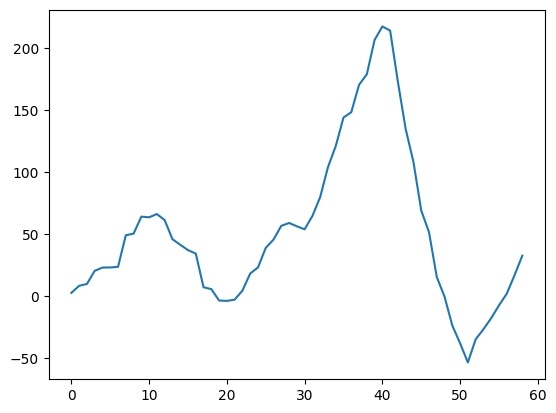

In [45]:
interesting_hist = hist[:60]
plt.plot(np.diff(interesting_hist))
diff_peaks = sorted(list(enumerate(np.diff(interesting_hist))), key=lambda tup: -tup[1])[:5]
diff_peaks

In [50]:
error_buffer = 5
z_crop_index = diff_peaks[0][0] - error_buffer
z_crop_index

35

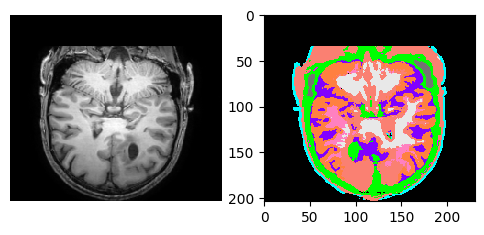

In [53]:
img , seg = read_img_and_seg(dataset_parent_dir[0])
img[:z_crop_index,:,:] = 0
seg[:z_crop_index,:,:] = 0
plot_mr_segment_sidebyside(img, seg)

In [55]:
def find_crop_index_z_direction(segment_img, cutoff_index=60, error_buffer=5):
    cortical_histogram = cortical_hist(segment_img)
    hist_interest = cortical_histogram[:cutoff_index]
    hist_diff = np.diff(hist_interest)
    diff_peaks = sorted(list(enumerate(hist_diff)), key=lambda tup: -tup[1])
    return diff_peaks[0][0] - error_buffer

In [58]:
img , seg = read_img_and_seg(dataset_parent_dir[1])
z_crop_index = find_crop_index_z_direction(seg)
print(z_crop_index)

41


## Script

In [ ]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import os

DATA_PARENT_DIR = '../Task1/brain/'
iterable_dir_list = sorted(os.listdir(DATA_PARENT_DIR), key=lambda x: x)
dataset_parent_dir = [os.path.join(DATA_PARENT_DIR, mri_path) for mri_path in iterable_dir_list]

In [6]:
def read_img_and_seg(image_parent_directory):
    mri_img_sitk = sitk.ReadImage(os.path.join(image_parent_directory,'mr.nii.gz'))
    segment_img_sitk = sitk.ReadImage(os.path.join(image_parent_directory,'mr_segmented2.nii.gz'))
    return mri_img_sitk, segment_img_sitk

def cortical_hist(image, window_size = 10):
    cortical_bone_label = 8
    cortical_bone = []

    for z in range(image.shape[0]):
        cortical_bone.append(np.sum(image[z, :, :] == cortical_bone_label))

    cortical_bone_smoothed = np.convolve(np.array(cortical_bone), np.ones(window_size)/window_size, mode='same')
    return cortical_bone_smoothed

def find_crop_index_z_direction(segment_img, cutoff_index=60, error_buffer=5, smooth_size=10):
    cortical_histogram = cortical_hist(segment_img, window_size=smooth_size)
    hist_interest = cortical_histogram[:cutoff_index]
    hist_diff = np.diff(hist_interest)
    diff_peaks = sorted(list(enumerate(hist_diff)), key=lambda tup: -tup[1])
    return diff_peaks[0][0] - error_buffer

In [ ]:
for dir in dataset_parent_dir[:120]:
    print(dir)
    img_sitk, seg_sitk = read_img_and_seg(dir)
    img, seg = sitk.GetArrayFromImage(img_sitk), sitk.GetArrayFromImage(seg_sitk)
    z_crop_index = find_crop_index_z_direction(seg)
    img[:z_crop_index,:,:] = 0
    img_neckremoved = sitk.GetImageFromArray(img)
    img_neckremoved.CopyInformation(img_sitk)
    sitk.WriteImage(img_neckremoved, os.path.join(dir, 'mr_neckremoved.nii.gz'))

it worked on category A, but not on category B\
So, one third done!